Problem 1

In [216]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import precision_score, accuracy_score, recall_score, classification_report, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

#loads cancer dataset
breast = load_breast_cancer()
X = breast.data
Y = breast.target
print(X.shape)

breast_input = pd.DataFrame(X)
breast_input.head()

(569, 30)


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [217]:
#splits data into test and training sets
X_train, X_test, y_train, y_test  = train_test_split(X,Y, test_size = 0.2, random_state = 42)

In [218]:
#scales features using standardscaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [219]:
#trains a naive bayes classifier
model = GaussianNB()
model.fit(X_train, y_train)

#makes prediction on test set
y_pred = model.predict(X_test) 

In [220]:
#Calculation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

In [221]:
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy)
print("Recall:", recall)
print("precision:", precision)

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Accuracy: 0.9649122807017544
Recall: 0.9859154929577465
precision: 0.958904109589041


Text(0.5, 23.52222222222222, 'Actual label')

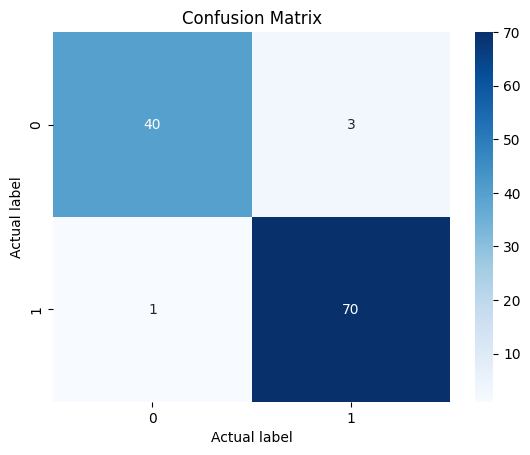

In [222]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues")
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Actual label')

Problem 2

In [223]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
# pca = PCA(n_components=2)
# principalComponents = pca.fit_transform(X) #in this case X = breast.data
# principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [224]:
#splits data into test and training sets
X_train, X_test, y_train, y_test  = train_test_split(X,Y, test_size = 0.2, random_state = 42)

In [225]:
Ks = range(0,30)
accuracies = []
precisions = []
recalls = []

print(X_train)

[[9.029e+00 1.733e+01 5.879e+01 ... 1.750e-01 4.228e-01 1.175e-01]
 [2.109e+01 2.657e+01 1.427e+02 ... 2.903e-01 4.098e-01 1.284e-01]
 [9.173e+00 1.386e+01 5.920e+01 ... 5.087e-02 3.282e-01 8.490e-02]
 ...
 [1.429e+01 1.682e+01 9.030e+01 ... 3.333e-02 2.458e-01 6.120e-02]
 [1.398e+01 1.962e+01 9.112e+01 ... 1.827e-01 3.179e-01 1.055e-01]
 [1.218e+01 2.052e+01 7.722e+01 ... 7.431e-02 2.694e-01 6.878e-02]]


In [226]:
print(Ks)

# K iterates through classification metrics for graph
for K in Ks:

  #performs PCA on test data and makes predictions
  pca = PCA(n_components=K+1)
  Xpca2 = pca.fit_transform(X)

  X_train, X_test, y_train, y_test  = train_test_split(Xpca2,Y, test_size = 0.2, random_state = 9)

  # X_train_pca = pca.fit_transform(X_train)
  # X_test_pca = pca.transform(X_test)

  #trains naive bayes classifier
  model = LogisticRegression()  
  model.fit(X_train, y_train)

  #makes prediction on test set
  y_pred = model.predict(X_test) 

  #accuracy = metrics.accuracy_score(y_test, y_pred)

  accuracy = metrics.accuracy_score(y_test, y_pred)
  precision = metrics.precision_score(y_test, y_pred)
  recall = metrics.recall_score(y_test, y_pred)

  #prints calculation metrics in loop
  print(K)
  print(accuracy)
  print(recall)
  print(precision)

  #stores the accuracy,precison and recall
  accuracies.append(accuracy)
  precisions.append(precision)
  recalls.append(recall)

  # K_list = [accuracy, recall, precision]
  # K_list.append(K+1)

#outputs the maximum of accuracies
max_accuracies = max(accuracies)
high_accuracies_K = accuracies.index(max(accuracies))+1

range(0, 30)
0
0.9122807017543859
0.9864864864864865
0.8902439024390244
1
0.9473684210526315
0.9864864864864865
0.9358974358974359
2
0.9473684210526315
0.9864864864864865
0.9358974358974359
3
0.9298245614035088
0.972972972972973
0.9230769230769231
4
0.9298245614035088
0.972972972972973
0.9230769230769231
5
0.9298245614035088
0.972972972972973
0.9230769230769231
6
0.9298245614035088
0.972972972972973
0.9230769230769231
7
0.9298245614035088
0.972972972972973
0.9230769230769231
8
0.9473684210526315
0.9864864864864865
0.9358974358974359
9
0.9385964912280702
0.9864864864864865
0.9240506329113924
10
0.9385964912280702
0.9864864864864865
0.9240506329113924
11
0.9385964912280702
0.9864864864864865
0.9240506329113924
12
0.9385964912280702
0.9864864864864865
0.9240506329113924
13
0.9385964912280702
0.9864864864864865
0.9240506329113924
14
0.9385964912280702
0.9864864864864865
0.9240506329113924
15
0.9385964912280702
0.9864864864864865
0.9240506329113924
16
0.9385964912280702
0.9864864864864865
0

569
569
30
30
30
30
max accuracy: 0.9473684210526315for K: 2


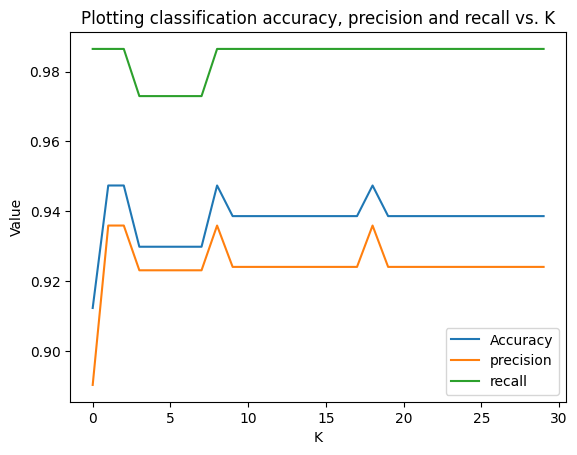

In [227]:
K_list  = range(0,30) 
print(len(X))
print(len(Y))
print(len(accuracies))
print(len(precisions))
print(len(recalls))
print(len(K_list))

print("max accuracy: " + str(max_accuracies)+"for K: " + str(high_accuracies_K))

plt.plot(K_list, accuracies, label = 'Accuracy')
plt.plot(K_list, precisions, label = 'precision')
plt.plot(K_list, recalls, label = 'recall')

plt.legend()
plt.title("Plotting classification accuracy, precision and recall vs. K")
plt.xlabel('K')
plt.ylabel('Value')
plt.show()

Problem 3

In [228]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
breast = load_breast_cancer()
X = breast.data
Y = breast.target

In [229]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

Ks = range(0,30)
accuracies = []
precisions = []
recalls = []

print(X_train)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

[[1.227e+01 1.792e+01 7.841e+01 ... 9.532e-02 3.455e-01 6.896e-02]
 [1.366e+01 1.515e+01 8.827e+01 ... 1.054e-01 3.387e-01 9.638e-02]
 [1.708e+01 2.715e+01 1.112e+02 ... 1.555e-01 3.010e-01 9.060e-02]
 ...
 [1.742e+01 2.556e+01 1.145e+02 ... 1.099e-01 1.603e-01 6.818e-02]
 [1.106e+01 1.496e+01 7.149e+01 ... 1.075e-01 3.301e-01 9.080e-02]
 [1.193e+01 1.091e+01 7.614e+01 ... 6.876e-02 2.460e-01 7.262e-02]]


In [230]:
print(Ks)
for K in Ks:
  pca = PCA(n_components=K+1)
  Xpca2 = pca.fit_transform(X)

  X_train, X_test, y_train, y_test  = train_test_split(Xpca2,Y, test_size = 0.2, random_state = 9)
  model = GaussianNB()
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  accuracy = metrics.accuracy_score(y_test, y_pred)
  precision = metrics.precision_score(y_test, y_pred)
  recall = metrics.recall_score(y_test, y_pred)

  print(K)
  print(accuracy)
  print(recall)
  print(precision)

  accuracies.append(accuracy)
  precisions.append(precision)
  recalls.append(recall)

  # K_list = [accuracy, recall, precision]
  # K_list.append(K+1)

max_accuracies = max(accuracies)
high_accuracies_K = accuracies.index(max(accuracies))+1

range(0, 30)
0
0.8947368421052632
0.9864864864864865
0.8690476190476191
1
0.8947368421052632
0.9864864864864865
0.8690476190476191
2
0.8859649122807017
0.972972972972973
0.8674698795180723
3
0.9122807017543859
0.9864864864864865
0.8902439024390244
4
0.9122807017543859
0.9864864864864865
0.8902439024390244
5
0.8947368421052632
0.9594594594594594
0.8875
6
0.9035087719298246
0.9594594594594594
0.8987341772151899
7
0.8859649122807017
0.9459459459459459
0.8860759493670886
8
0.8771929824561403
0.9324324324324325
0.8846153846153846
9
0.8771929824561403
0.9324324324324325
0.8846153846153846
10
0.8771929824561403
0.9324324324324325
0.8846153846153846
11
0.8859649122807017
0.9459459459459459
0.8860759493670886
12
0.8947368421052632
0.9459459459459459
0.8974358974358975
13
0.9035087719298246
0.9459459459459459
0.9090909090909091
14
0.8947368421052632
0.9324324324324325
0.9078947368421053
15
0.8947368421052632
0.9324324324324325
0.9078947368421053
16
0.8947368421052632
0.9324324324324325
0.9078947

569
569
30
30
30
30
max accuracy: 0.9122807017543859for K: 4


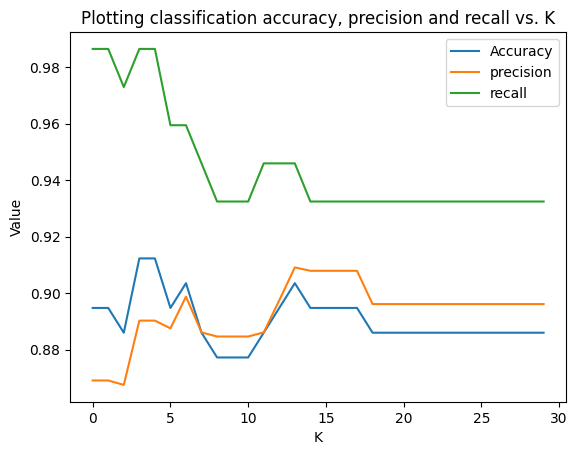

In [231]:
K_list  = range(0,30)
print(len(X))
print(len(Y))
print(len(accuracies))
print(len(precisions))
print(len(recalls))
print(len(K_list))

print("max accuracy: " + str(max_accuracies)+"for K: " + str(high_accuracies_K))

plt.plot(K_list, accuracies, label = 'Accuracy')
plt.plot(K_list, precisions, label = 'precision')
plt.plot(K_list, recalls, label = 'recall')

plt.legend()
plt.title("Plotting classification accuracy, precision and recall vs. K")
plt.xlabel('K')
plt.ylabel('Value')
plt.show()